In [1]:
using Pkg
Pkg.add([
     "MLJ", 
     "MLJBase", 
     "MLJModels", 
     "MLJEnsembles", 
     "MLJLinearModels", 
     "DecisionTree", 
     "MLJDecisionTreeInterface", 
     "NaiveBayes", 
     "EvoTrees", 
     "CategoricalArrays", 
     "Random",
     "LIBSVM",           
     "Plots",            
     "MLJModelInterface", 
     "CSV",              
     "DataFrames",      
     "MLJFlux", 
     "UrlDownload",      
     "XGBoost",
     "NearestNeighborModels",
     "Tables"
])

include("Utils.jl")
include("Approaches.jl")
include("preprocessings.jl")
include("models.jl")

using .Utils
using .Approaches
using CSV, DataFrames, Random

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main.Utils /Users/ana/.julia/packages/MLJModels/wEnSQ/src/loading.jl:159


import MLJFlux ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main.Approaches /Users/ana/.julia/packages/MLJModels/wEnSQ/src/loading.jl:159


import MLJLIBSVMInterface ✔
import MLJDecisionTreeInterface ✔
import NearestNeighborModels ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main.Approaches /Users/ana/.julia/packages/MLJModels/wEnSQ/src/loading.jl:159
┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main.Approaches /Users/ana/.julia/packages/MLJModels/wEnSQ/src/loading.jl:159


In [4]:
import Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Statistics")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [12]:
using CSV, DataFrames, Statistics

path = "wdbc.data"   # o la ruta donde lo tengas

df = CSV.read(path, DataFrame; header=false)

colnames = [
    "id", "diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
    "smoothness_mean", "compactness_mean", "concavity_mean", "concave_points_mean",
    "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se",
    "smoothness_se", "compactness_se", "concavity_se", "concave_points_se",
    "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst",
    "smoothness_worst", "compactness_worst", "concavity_worst", "concave_points_worst",
    "symmetry_worst", "fractal_dimension_worst"
]

rename!(df, Symbol.(colnames))

first(df, 5), size(df)



(5×32 DataFrame
 Row │ id        diagnosis  radius_mean  texture_mean  perimeter_mean  area_me ⋯
     │ Int64     String1    Float64      Float64       Float64         Float64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │   842302  M                17.99         10.38          122.8      1001 ⋯
   2 │   842517  M                20.57         17.77          132.9      1326
   3 │ 84300903  M                19.69         21.25          130.0      1203
   4 │ 84348301  M                11.42         20.38           77.58      386
   5 │ 84358402  M                20.29         14.34          135.1      1297 ⋯
                                                              27 columns omitted, (569, 32))

In [13]:
g = groupby(df, :diagnosis)

class_counts = combine(g) do sdf
    (count = nrow(sdf),)
end

class_counts

Row,diagnosis,count
,String1,Int64
1,M,212
2,B,357


In [14]:
total = nrow(df)
class_counts.proportion = class_counts.count ./ total

class_counts

Row,diagnosis,count,proportion
,String1,Int64,Float64
1,M,212,0.372583
2,B,357,0.627417


In [15]:
malignant = df[df.diagnosis .== "M", :]
benign    = df[df.diagnosis .== "B", :]

Row,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
,Int64,String1,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,8510426,B,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259
2,8510653,B,13.08,15.71,85.63,520.0,0.1075,0.127,0.04568,0.0311,0.1967,0.06811,0.1852,0.7477,1.383,14.67,0.004097,0.01898,0.01698,0.00649,0.01678,0.002425,14.5,20.49,96.09,630.5,0.1312,0.2776,0.189,0.07283,0.3184,0.08183
3,8510824,B,9.504,12.44,60.34,273.9,0.1024,0.06492,0.02956,0.02076,0.1815,0.06905,0.2773,0.9768,1.909,15.7,0.009606,0.01432,0.01985,0.01421,0.02027,0.002968,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.245,0.07773
4,854941,B,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,0.1839,2.342,1.17,14.16,0.004352,0.004899,0.01343,0.01164,0.02671,0.001777,13.3,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
5,85713702,B,8.196,16.84,51.71,201.9,0.086,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.01646,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409
6,857155,B,12.05,14.63,78.04,449.3,0.1031,0.09092,0.06592,0.02749,0.1675,0.06043,0.2636,0.7294,1.848,19.87,0.005488,0.01427,0.02322,0.00566,0.01428,0.002422,13.76,20.7,89.88,582.6,0.1494,0.2156,0.305,0.06548,0.2747,0.08301
7,857156,B,13.49,22.3,86.91,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,0.05718,0.2338,1.353,1.735,20.2,0.004455,0.01382,0.02095,0.01184,0.01641,0.001956,15.15,31.82,99.0,698.8,0.1162,0.1711,0.2282,0.1282,0.2871,0.06917
8,857343,B,11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563
9,857373,B,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,0.05953,0.1872,0.9234,1.449,14.55,0.004477,0.01177,0.01079,0.007956,0.01325,0.002551,14.67,23.19,96.08,656.7,0.1089,0.1582,0.105,0.08586,0.2346,0.08025


In [23]:
features = names(df)[3:end]  # quitamos id y diagnosis

stats = DataFrame(
    feature = features,
    min_M  = [minimum(malignant[!, f]) for f in features],
    max_M  = [maximum(malignant[!, f]) for f in features],
    mean_M = [mean(malignant[!, f])    for f in features],
    min_B  = [minimum(benign[!, f])    for f in features],
    max_B  = [maximum(benign[!, f])    for f in features],
    mean_B = [mean(benign[!, f])       for f in features],
)

stats[21:30, :]

Row,feature,min_M,max_M,mean_M,min_B,max_B,mean_B
,String,Float64,Float64,Float64,Float64,Float64,Float64
1,radius_worst,12.84,36.04,21.1348,7.93,19.82,13.3798
2,texture_worst,16.67,49.54,29.3182,12.02,41.78,23.5151
3,perimeter_worst,85.1,251.2,141.37,50.41,127.1,87.0059
4,area_worst,508.1,4254.0,1422.29,185.2,1210.0,558.899
5,smoothness_worst,0.08822,0.2226,0.144845,0.07117,0.2006,0.124959
6,compactness_worst,0.05131,1.058,0.374824,0.02729,0.5849,0.182673
7,concavity_worst,0.02398,1.17,0.450606,0.0,1.252,0.166238
8,concave_points_worst,0.02899,0.291,0.182237,0.0,0.175,0.0744443
9,symmetry_worst,0.1565,0.6638,0.323468,0.1566,0.4228,0.270246


In [24]:
using DataFrames

# Crea el DataFrame con tus datos (pega aquí los valores que ya tienes)
df = DataFrame(
    feature = [
        "radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean",
        "compactness_mean","concavity_mean","concave_points_mean","symmetry_mean","fractal_dimension_mean",
        "radius_se","texture_se","perimeter_se","area_se","smoothness_se",
        "compactness_se","concavity_se","concave_points_se","symmetry_se","fractaldimension_se",
        "radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst",
        "compactness_worst","concavity_worst","concave_points_worst","symmetry_worst","fractal_dimension_worst"
    ],
    mean_M = [
        17.4628,21.6049,115.365,978.376,0.102898,0.145188,0.160775,0.08799,0.192909,0.0626801,
        0.609083,1.21091,4.32393,72.6724,0.00678009,0.0322812,0.041824,0.0150605,0.0204724,0.00406241,
        21.1348,29.3182,141.37,1422.29,0.144845,0.374824,0.450606,0.182237,0.323468,0.09153
    ],
    mean_B = [
        12.1465,17.9148,78.0754,462.79,0.0924776,0.0800846,0.0460576,0.0257174,0.174186,0.0628674,
        0.284082,1.22038,2.00032,21.1351,0.0071959,0.0214382,0.0259967,0.00985765,0.0205838,0.00363605,
        13.3798,23.5151,87.0059,558.899,0.124959,0.182673,0.166238,0.0744443,0.270246,0.0794421
    ]
)

# Calcula la diferencia porcentual
df.percent_diff = ((df.mean_M .- df.mean_B) ./ df.mean_B) .* 100

# Ordenar de mayor a menor diferencia para ver las más importantes
sort!(df, :percent_diff, rev=true)

df

Row,feature,mean_M,mean_B,percent_diff
,String,Float64,Float64,Float64
1,concavity_mean,0.160775,0.0460576,249.074
2,area_se,72.6724,21.1351,243.847
3,concave_points_mean,0.08799,0.0257174,242.142
4,concavity_worst,0.450606,0.166238,171.061
5,area_worst,1422.29,558.899,154.481
6,concave_points_worst,0.182237,0.0744443,144.796
7,perimeter_se,4.32393,2.00032,116.162
8,radius_se,0.609083,0.284082,114.404
9,area_mean,978.376,462.79,111.408


In [28]:
using CSV, DataFrames, StatsPlots, CategoricalArrays

# Cargar datos (ajusta la ruta)
df = CSV.read("wdbc.data", DataFrame; header=false)

# Renombrar columnas (ya lo tenías, pero lo recuerdo)
colnames = [
    "id", "diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
    "smoothness_mean", "compactness_mean", "concavity_mean", "concave_points_mean",
    "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se",
    "smoothness_se", "compactness_se", "concavity_se", "concave_points_se",
    "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst",
    "smoothness_worst", "compactness_worst", "concavity_worst", "concave_points_worst",
    "symmetry_worst", "fractal_dimension_worst"
]
rename!(df, Symbol.(colnames))

# Asegurar que diagnosis es categórica
df.diagnosis = CategoricalArray(df.diagnosis)

569-element CategoricalArray{String1,1,UInt32}:
 String1("M")
 String1("M")
 String1("M")
 String1("M")
 String1("M")
 String1("M")
 String1("M")
 String1("M")
 String1("M")
 String1("M")
 ⋮
 String1("B")
 String1("B")
 String1("M")
 String1("M")
 String1("M")
 String1("M")
 String1("M")
 String1("M")
 String1("B")

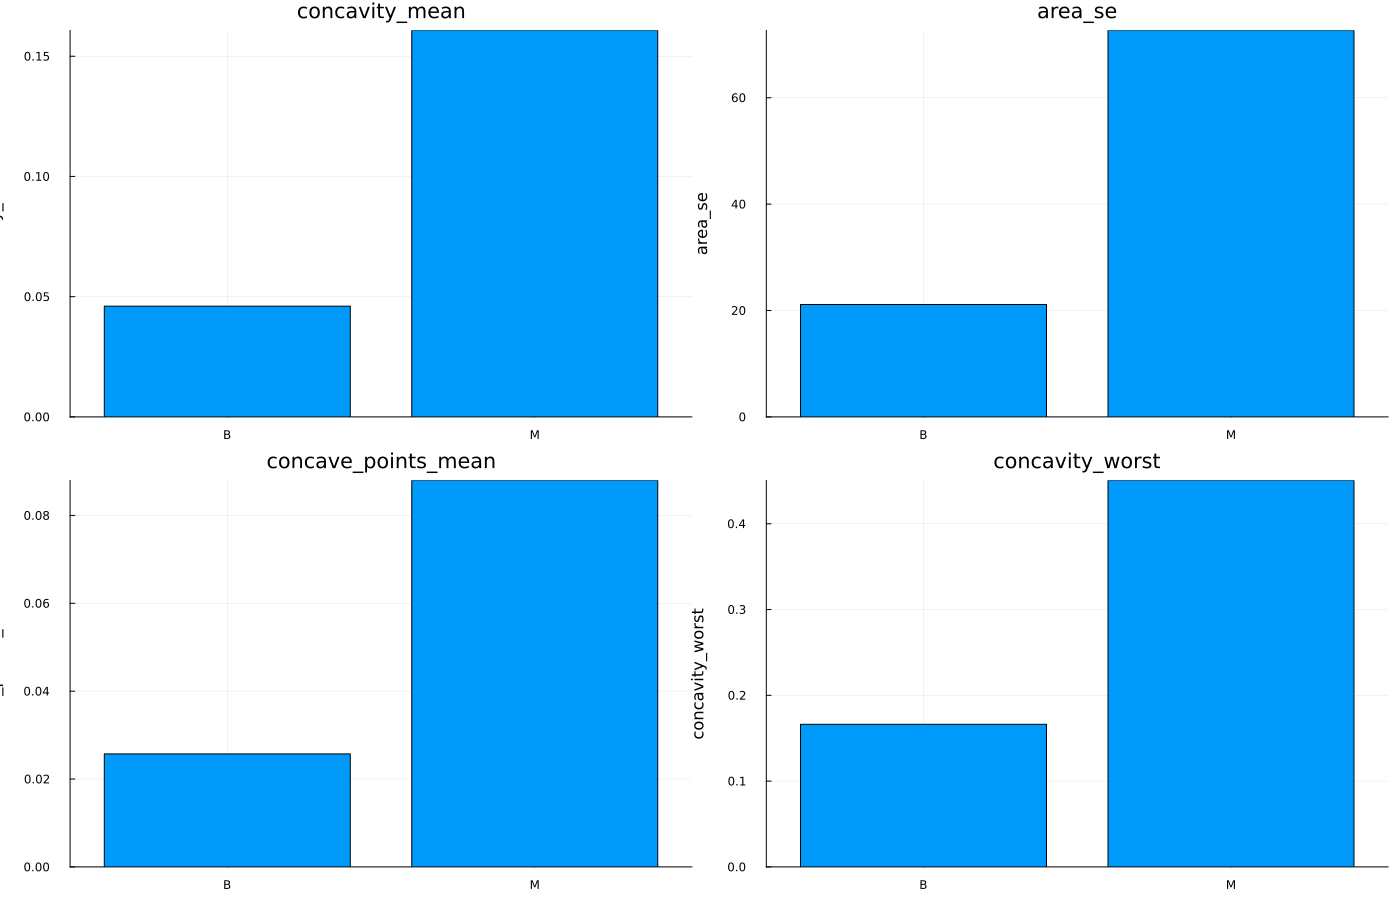

In [35]:
using StatsPlots

features = [
    :concavity_mean,
    :area_se,
    :concave_points_mean,
    :concavity_worst
]

plots = []

for f in features
    g = groupby(df, :diagnosis)
    stats = combine(g, f => mean => :mean_val)

    push!(plots,
        bar(
            String.(stats.diagnosis), stats.mean_val;
            xlabel = "",            # ← QUITAMOS EL TEXTO "Class"
            ylabel = String(f),
            title = String(f),
            legend = false
        )
    )
end

plot(plots..., layout = (2, 2), size=(1400, 900))

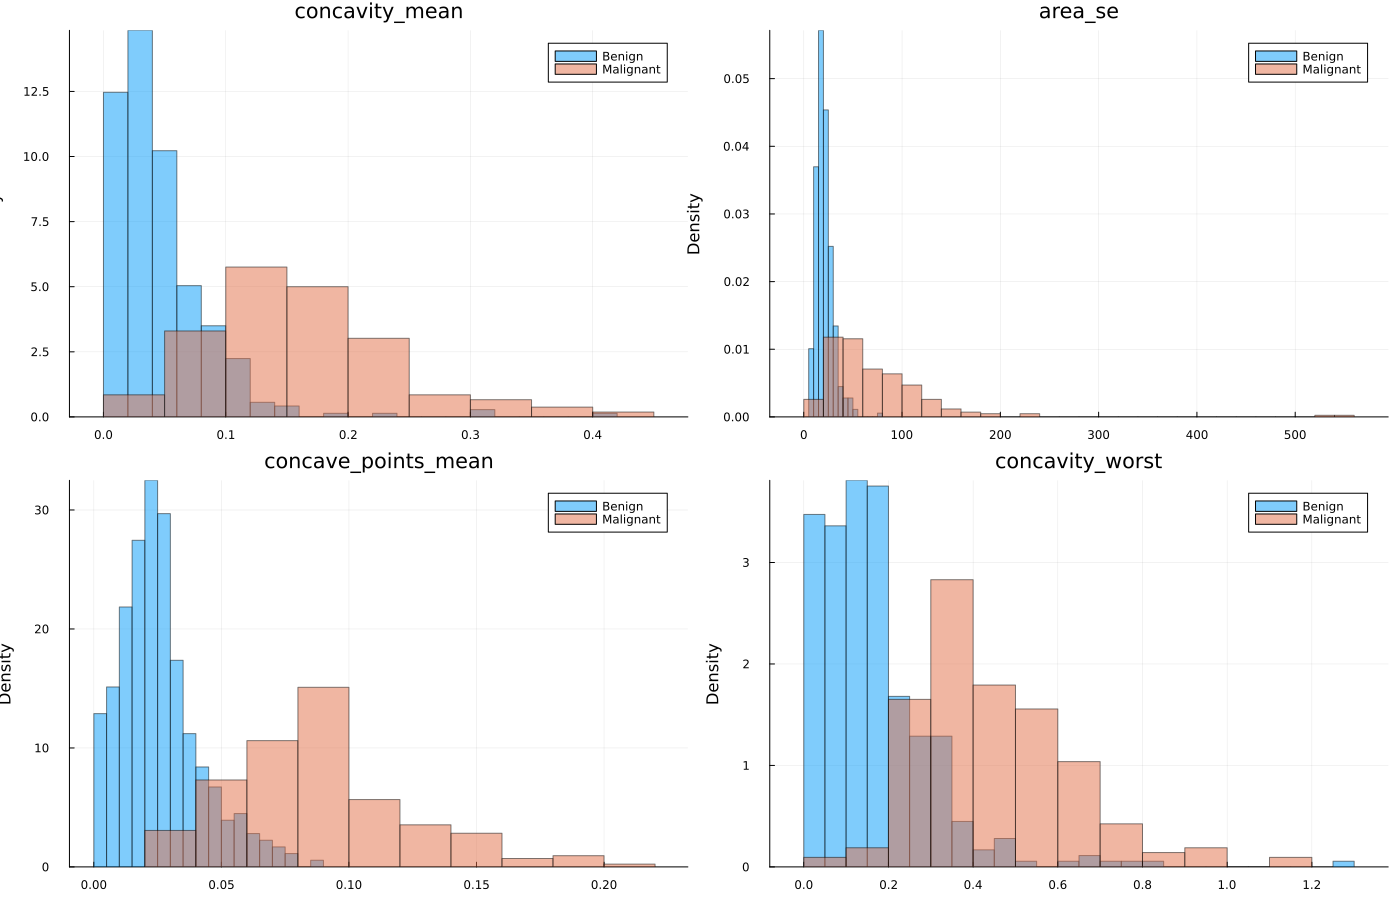

In [36]:
using StatsPlots

features = [
    :concavity_mean,
    :area_se,
    :concave_points_mean,
    :concavity_worst
]

plots = []

for f in features
    vals_B = df[df.diagnosis .== "B", f]
    vals_M = df[df.diagnosis .== "M", f]

    p = histogram(
        vals_B;
        normalize = :pdf,
        alpha = 0.5,
        label = "Benign",
        xlabel = "",            # ← Quitamos “Class”
        ylabel = "Density",
        title = String(f)
    )

    histogram!(
        p,
        vals_M;
        normalize = :pdf,
        alpha = 0.5,
        label = "Malignant"
    )

    push!(plots, p)
end

plot(plots..., layout = (2, 2), size=(1400, 900))

In [46]:
using DataFrames, Statistics

# Lista de las 30 features numéricas
features_30 = [
    :radius_mean, :texture_mean, :perimeter_mean, :area_mean,
    :smoothness_mean, :compactness_mean, :concavity_mean, :concave_points_mean,
    :symmetry_mean, :fractal_dimension_mean,
    :radius_se, :texture_se, :perimeter_se, :area_se,
    :smoothness_se, :compactness_se, :concavity_se, :concave_points_se,
    :symmetry_se, :fractal_dimension_se,
    :radius_worst, :texture_worst, :perimeter_worst, :area_worst,
    :smoothness_worst, :compactness_worst, :concavity_worst, :concave_points_worst,
    :symmetry_worst, :fractal_dimension_worst
]

stats_total = DataFrame(
    feature = String[],
    min = Float64[],
    max = Float64[],
    mean = Float64[]
)

for f in features_30
    col = df[!, f]
    push!(stats_total, (
        feature = String(f),
        min = minimum(col),
        max = maximum(col),
        mean = mean(col)
    ))
end

stats_total[21:30, :]

Row,feature,min,max,mean
,String,Float64,Float64,Float64
1,radius_worst,7.93,36.04,16.2692
2,texture_worst,12.02,49.54,25.6772
3,perimeter_worst,50.41,251.2,107.261
4,area_worst,185.2,4254.0,880.583
5,smoothness_worst,0.07117,0.2226,0.132369
6,compactness_worst,0.02729,1.058,0.254265
7,concavity_worst,0.0,1.252,0.272188
8,concave_points_worst,0.0,0.291,0.114606
9,symmetry_worst,0.1565,0.6638,0.290076


In [40]:
null_check = DataFrame(
    feature = String[],
    num_missing = Int[]
)

for c in names(df)
    push!(null_check, (
        feature = String(c),
        num_missing = count(ismissing, df[!, c])
    ))
end

null_check

Row,feature,num_missing
,String,Int64
1,id,0
2,diagnosis,0
3,radius_mean,0
4,texture_mean,0
5,perimeter_mean,0
6,area_mean,0
7,smoothness_mean,0
8,compactness_mean,0
9,concavity_mean,0
